# Training example: SEAS benchmark BP3-QD

Created by Duo Li (dli@geophysik.uni-muenchen.de)

June 30, 2022

## Introduction

The use of numerical modeling to shed light on our understanding of earthquake dynamics and
inform seismic hazard assessment relies fundamentally on credible, reproducible model results. The
SEAS (Sequences of Earthquakes and Aseismic Slip) initiative has set out to facilitate commu10
nity code comparisons, verify and advance the next generation of long-term earthquake models
that capture all phases of the seismic cycle, from the slow-loading periods between earthquakes,
through the dynamic rupture itself and postseismic processes (https://strike.scec.org/cvws/seas/benchmark_descriptions.html).

## BP3 Discription

BP3-QD considers a planar, dipping fault embedded in a homogeneous, linear elastic
half-space with a free surface where motion is plane-strain. The fault is governed by rate-and-state friction
down dip to a distance Wf and creeps at an imposed constant rate Vp down to the in nite dip distance.
The simulations will include the nucleation, propagation, and arrest of quasi-dynamic (BP3-QD) and fully-
dynamic (BP3-FD) earthquakes, and aseismic slip in the post- and inter-seismic periods. The left and right
sides of the fault are labeled with - and +, respectively.

<img src="figures/bp3-disp.png" alt="drawing" width="500"/>
<!-- ![image](bp3-disp.png) -->


## Method 

### Conventions

We define slip on the fault by:

<img src="figures/bp3-slip.png" alt="drawing" width="600"/>

Note that reverse faulting yields positive values. We omit fault-opening so no opening slip is allowed.

The traction vector on each side of the fault is denoted with a superscript corresponding to the side of the fault and given by $T^\pm = T_0^\pm+ \triangle  T^\pm$

<img src="figures/bp3-traction.png" alt="drawing" width="600"/>

We require that components of the traction vector on either side of the fault be equal and opposite, namely, $-T^+ = T^-, -T_0^+ = T_0^-, -\triangle T^+ = \triangle T^-,$.

Below down-dip distance Wf, the fault creeps at an imposed constant rate, given by the
interface condition $V(x,t) = V_{pl}$

### Stress initiation

We set the initial background stress by :

<img src="figures/bp3-bk.png" alt="drawing" width="600"/>

and the stress changes will be:

<img src="figures/bp3-change.png" alt="drawing" width="600"/>


### Govening equations

We impose that shear stress on the fault be equal to fault strength, namely, $\tau= F(V,\Theta,\sigma_n)$.

The friction coefficient $f$ is given by a regularized formulation of Rate-and-state friction,

<img src="figures/bp3-rsf.png" alt="drawing" width="600"/>

for reference friction coefficient f0, reference slip rate V0, and rate-and-state parameters a
and b. 

The effective normal stress is defined as (which takes into account changes in normal stress induced by
slip on the fault)

<img src="figures/bp3-sigma.png" alt="drawing" width="300"/>

For BP3-QD,   $\tau =\tau^0+ \triangle \tau - \eta V$ is the sum of the prestress, the shear stress change due
to quasi-static deformation, and the radiation damping approximation to inertia, where
  $\eta = \mu/ 2c_s$ is half the shear-wave impedance for shear wave speed



### Model setup

We list the key parameters in Table 1. 

<img src="figures/bp3-table.png" alt="drawing" width="600"/>




## Boundary element method (BIE)


Earthquakes have been recognized as resulting from stick-slip frictional instability on a pre-existing fault.

Boundary integral element method (BIE or BEM) is a numerical computational method of solving linear partial di erential equations under certain boundary conditions.


The quasi-dynamic relation between shear stress and fault slip is introduced by Rice (1993),
\begin{equation}
\tau _i\left(t\right) = - \sum_{j=1}^{N} K_{i,j} \left(\delta_j\left(t\right)-V_pl t\right) -\eta \frac{d\delta_i\left(t\right)}{dt}, \label{eqn:shear-slip}
\end{equation}

There are two commonly used evolution laws:"aging" law and "slip" law, for describing the evolution of state variable. 
\begin{equation}
\frac{d\theta}{dt} = 1- \frac{V \theta}{d_c}, \label{eqn:rs-theta}
\end{equation}
\begin{equation}
\frac{d\theta}{dt} =- \frac{V \theta}{d_c}\ln\left( \frac{V \theta}{d_c}\right).
\end{equation} 

### 5th-order Runge-Kutta
Adaptively change time stepping according to fault slip rate $V$ (Numerical receipt)


## Static Stiffness

<img src="figures/okada.png" alt="drawing" width="500"/>


### triangular elements
This
construction was enabled by the calculation of
Green’s functions for an angular dislocation in a
uniform elastic half space given by Comninou
(1973) and Comninou and Dunders (1975) 

<img src="figures/dislocation.png" alt="drawing" width="300"/>

Each of the three legs can be constructed by the superposition of two
angular dislocations between each set of triangle vertices

<img src="figures/triangle_legs.png" alt="drawing" width="300"/>

Thus, to calculate the total deformation
associated with uniform slip on a single TDE we can
calculate the appropriate line integrals around the
element edges (legs) so that the total displacement is
given by the sum of the displacements from each of
the three legs

<img src="figures/triangles.png" alt="drawing" width="300"/>


#### Quasi-dynamic
This method is called quasi-dynamic method, as it does not consider the really
temporal-spacial Green's function in the integral



In [ ]:
# example 1: calculate stiffness for a 60 dipping thrust-slip fault
# read geometry and mesh file: fault_bp3_h100_D60.gts
# num_nodes=1202, num_eles=1200

!OMPI_ALLOW_RUN_AS_ROOT=1 OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 mpirun -np 4 calc_stiffness > log

#!docker run -v $(pwd):/shared/ -u $(id -u):$(id -g) daisy20170101/tribie-training "$@" calc_stiffness 
        
# after a few minutes you will get some binary files in stiffness/

In [ ]:
# exercise 1:simulate earthquake cycles on the 60-dipping thrust fault
!OMPI_ALLOW_RUN_AS_ROOT=1 OMPI_ALLOW_RUN_AS_ROOT_CONFIRM=1 mpirun -np 4 tribie > log2 

#!docker run -v $(pwd):/shared/ -u $(id -u):$(id -g) daisy20170101/tribie-training "$@" calc_stiffness 
        
# after several minutes you will get some files in output/ 

In [6]:
# plot
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print('load modulus')

load modulus


In [ ]:
# load data of coseismic slip along the downdip distance

slpfile='output/slip-BP3_h100_D60_L60.dat'
dp_pos = np.loadtxt(slpfile,comments='#',skiprows=15,max_rows=1)
time_series = np.loadtxt(slpfile,comments='#',skiprows=15+1)

In [ ]:
yrs = 365*24*3600
it_cos = 0.0
it_int = 0.0

## plot coseismic (red) and interseismic (blue) slip along downdip distance.
fig,ax11 = plt.subplots(nrows=1,ncols=1,figsize=(10,4))

for it in range(len(time_series[:,1])):
    if(time_series[it,1]>-3.0 ):
        if(time_series[it,0]-it_cos > 1.0):
            ax11.plot(time_series[it,2:83],dp_pos[2:83],'-r')
            it_cos = time_series[it,0] 
    else:
        if(time_series[it,0]-it_int > 5*yrs ):
            ax11.plot(time_series[it,2:83],dp_pos[2:83],'-b')
            it_int = time_series[it,0]
    
ax11.set_xlim([0,20])
ax11.set_ylim([0,24000])
ax11.invert_yaxis()
ax11.set_xlabel('slip (m)')
ax11.set_ylabel('downdip distance (m)')

<IPython.core.display.Javascript object>


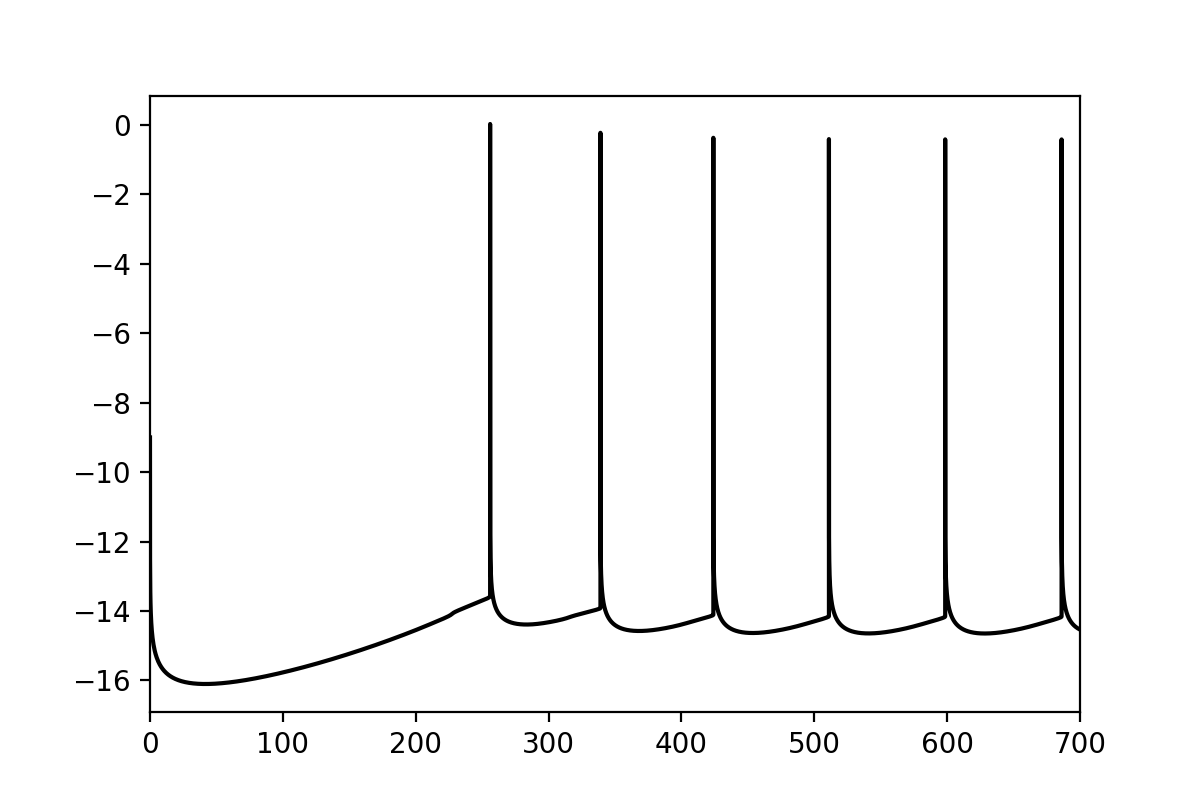

(0.0, 700.0)

In [85]:
# plot maximum slip rate on the fault

sr_file = 'output/fltst_dp075-BP3_h100_D60_L60.dat'
sr_data = np.loadtxt(sr_file,comments='#',skiprows=19)

fig,ax1 = plt.subplots(nrows=1,ncols=1,figsize=(6,4))
ax1.plot(sr_data[:,0]/yrs,sr_data[:,2],'-k')
ax1.set_xlim([0,700])

In [ ]:
# exercise 1
# load series data of shear stress along the downdip distance and plot

stressfile='.../...'
dp_pos = np.loadtxt(slpfile,comments='#',skiprows=15,max_rows=1)
dp_pos = np.loadtxt(slpfile,comments='#',skiprows=15,max_rows=1)
time_series = np.loadtxt(slpfile,comments='#',skiprows=15+1)

In [ ]:
# exercise 2


In [ ]:
# exercise 3
# simulate subduction fault at 30 dipping angle and plot the results

# step 1. create mesh file

# step 2. calculate stiffness

# step 3. change parameter input file.

# step 4. simulate

# step 5 .....

## References
Rice, J. R. (1993). "Spatio‐temporal complexity of slip on a fault." Journal of Geophysical Research: Solid Earth (1978–2012) 98(B6): 9885-9907.

Jiang, J., B. Erickson, V. Lambert, J.-P. Ampuero, R. Ando, S. Barbot, C. Cattania, L. D. Zilio, B. Duan, E. M. D. . and et al. "Community-Driven Code Comparisons for Three-Dimensional Dynamic Modeling of Sequences of Earthquakes and Aseismic Slip (SEAS)." Earth and Space Science Open Archive: 55.

Comninou, M. and J. Dundurs (1975). "The angular dislocation in a half space." Journal of Elasticity 5(3-4): 203-216.

Meade, B. J. (2007). "Algorithms for the calculation of exact displacements, strains, and stresses for triangular dislocation elements in a uniform elastic half space." Computers & Geosciences 33(8): 1064-1075.

        